#Harshad Katariya

Reg No: 22MCS1018

Mob No:8347158270

Email: katariyaharshad1999@gmail.com

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# loading data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaiburr_company/new/rows.csv')
df.shape

(1282355, 18)

#1. Explanatory Data Analysis and Feature Engineering

In [4]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275
1,05/10/2019,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,NaN,NaN,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,05/10/2019,Closed with explanation,Yes,NaN,3238228
2,05/10/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3237964
3,05/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3238479
4,05/10/2019,Checking or savings account,Checking account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,05/10/2019,In progress,Yes,NaN,3238460


In [5]:
df.head(2).T

,0,1
Date received,05/10/2019,05/10/2019
Product,Checking or savings account,Checking or savings account
Sub-product,Checking account,Other banking product or service
Issue,Managing an account,Managing an account
Sub-issue,Problem using a debit or ATM card,Deposits and withdrawals
Consumer complaint narrative,NaN,NaN
Company public response,NaN,NaN
Company,NAVY FEDERAL CREDIT UNION,BOEING EMPLOYEES CREDIT UNION
State,FL,WA
ZIP code,328XX,98204


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282355 entries, 0 to 1282354
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   Date received                 1282355 non-null  object
 1   Product                       1282355 non-null  object
 2   Sub-product                   1047189 non-null  object
 3   Issue                         1282355 non-null  object
 4   Sub-issue                     751169 non-null   object
 5   Consumer complaint narrative  383564 non-null   object
 6   Company public response       449082 non-null   object
 7   Company                       1282355 non-null  object
 8   State                         1262955 non-null  object
 9   ZIP code                      1167057 non-null  object
 10  Tags                          175643 non-null   object
 11  Consumer consent provided?    690654 non-null   object
 12  Submitted via                 1282355 non-

In [7]:
df.Product.unique()

array(['Checking or savings account', 'Debt collection',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Mortgage', 'Student loan', 'Vehicle loan or lease',
       'Credit card or prepaid card',
       'Payday loan, title loan, or personal loan',
       'Money transfer, virtual currency, or money service',
       'Credit reporting', 'Credit card', 'Bank account or service',
       'Consumer Loan', 'Prepaid card', 'Other financial service',
       'Payday loan', 'Money transfers', 'Virtual currency'], dtype=object)

In [4]:
#create new dataframe
df_new = df[['Product', 'Consumer complaint narrative']].copy()


In [5]:
df_new = df_new[pd.notnull(df_new['Consumer complaint narrative'])]

In [6]:
df_new.columns = ['Product', 'Consumer_complaint_narrative']

In [8]:
# Percentage of complaints with text
total = df_new['Consumer_complaint_narrative'].notnull().sum()
round((total/len(df)*100),1)

29.9

In [17]:
df.Product.unique()

array(['Checking or savings account', 'Debt collection',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Mortgage', 'Student loan', 'Vehicle loan or lease',
       'Credit card or prepaid card',
       'Payday loan, title loan, or personal loan',
       'Money transfer, virtual currency, or money service',
       'Credit reporting', 'Credit card', 'Bank account or service',
       'Consumer Loan', 'Prepaid card', 'Other financial service',
       'Payday loan', 'Money transfers', 'Virtual currency'], dtype=object)

In [7]:
# Renaming categories
df_new.replace({'Product':
             {'Credit reporting, credit repair services, or other personal consumer reports':
              'Credit reporting, repair, or other',
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}},
            inplace= True)

In [10]:
#After Renaming
df_new.Product.unique()

array(['Credit reporting, repair, or other', 'Debt collection',
       'Student loan', 'Mortgage', 'Credit card or prepaid card',
       'Checking or savings account',
       'Money transfer, virtual currency, or money service',
       'Vehicle loan or lease',
       'Payday loan, title loan, or personal loan',
       'Bank account or service', 'Consumer Loan', 'Money transfers',
       'Other financial service'], dtype=object)

In [8]:
# Create a new column 'category_id'
df_new['category_id'] = df_new['Product'].factorize()[0]
category_id_df = df_new[['Product', 'category_id']].drop_duplicates()  #drope Duplicates for "product,category_id"

# Dictionaries
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

# New dataframe
df_new.head()

,Product,Consumer_complaint_narrative,category_id
29904,"Credit reporting, repair, or other",The Summer of XX/XX/2018 I was denied a mortga...,0
30629,"Credit reporting, repair, or other",There are many mistakes appear in my report wi...,0
30735,"Credit reporting, repair, or other",There are many mistakes appear in my report wi...,0
30795,"Credit reporting, repair, or other",There are many mistakes appear in my report wi...,0
30807,"Credit reporting, repair, or other",There are many mistakes appear in my report wi...,0


In [10]:
df_new.category_id.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [9]:
selected_categories = ['Credit reporting, repair, or other', 'Debt collection', 'Consumer Loan', 'Mortgage']

filtered_df = df_new[df_new['Product'].isin(selected_categories)]


In [49]:
filtered_df.category_id.unique()

array([ 0,  1,  3, 10])

In [40]:
# Get unique product categories
unique_products = filtered_df['Product'].unique()

# Iterate through unique products and print their category_id
for product in unique_products:
    category_id = filtered_df[filtered_df['Product'] == product]['category_id'].iloc[0]
    print(f"Product: {product}, category_id: {category_id}")


Product: Credit reporting, repair, or other, category_id: 0
Product: Debt collection, category_id: 1
Product: Mortgage, category_id: 3
Product: Consumer Loan, category_id: 10


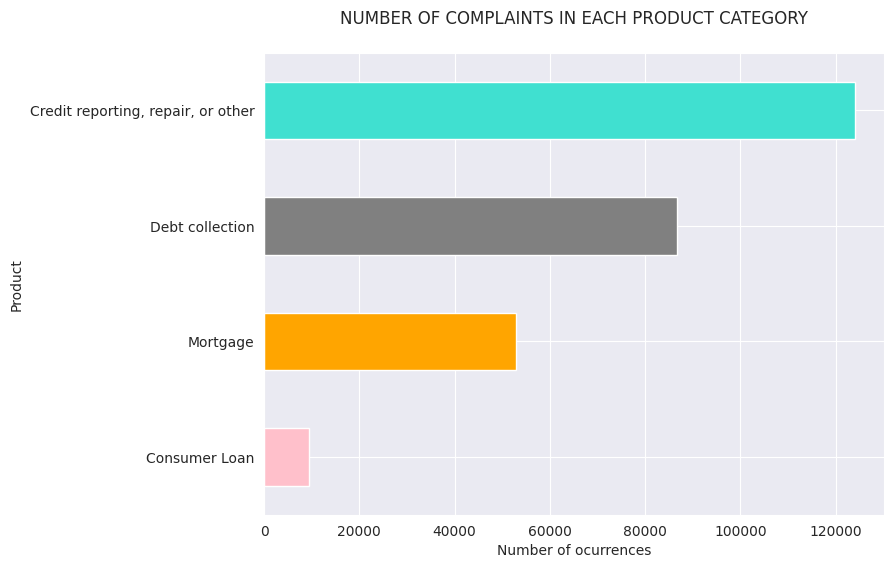

In [26]:
fig = plt.figure(figsize=(8,6))
colors = ['pink','orange','grey','turquoise']
filtered_df.groupby('Product').Consumer_complaint_narrative.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

<Axes: ylabel='Product'>

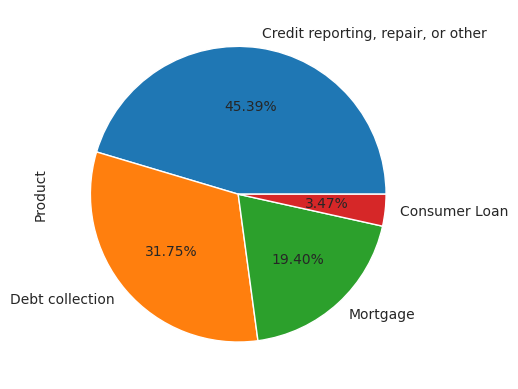

In [30]:
filtered_df["Product"].value_counts().plot(kind="pie", autopct="%.2f%%")

#2. Text Pre-Processing

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [11]:
from sklearn.metrics.pairwise import cosine_similarity


In [17]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from scipy import sparse

In [18]:
# Initialize a TF-IDF vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, stop_words='english')

X = tfidf.fit_transform(filtered_df['Consumer_complaint_narrative'])   # Transform the text data into TF-IDF features

y = filtered_df['category_id']

num_features_to_select = 100
k_best = SelectKBest(mutual_info_classif, k=num_features_to_select)
X_selected = k_best.fit_transform(X, y)

# X_selected contains selected numerical features


In [19]:
labels = filtered_df.category_id

#3. Selection of Multi Classification model

In [10]:
X = filtered_df['Consumer_complaint_narrative'] # Collection of documents
y = filtered_df['Product'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state = 0)

Models

Random Forest

Linear Support Vector Machine

Multinomial Naive Bayes

Logistic Regression

In [20]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_selected, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

#4. Comparison of model performance

In [22]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1,
          ignore_index=True)
acc.columns = ['Mean_Accuracy', 'Standard_deviation']
acc

,Mean_Accuracy,Standard_deviation
model_name,,
LinearSVC,0.804856,0.010588
LogisticRegression,0.805881,0.010166
MultinomialNB,0.646119,0.017687
RandomForestClassifier,0.764042,0.006960


Box Plot

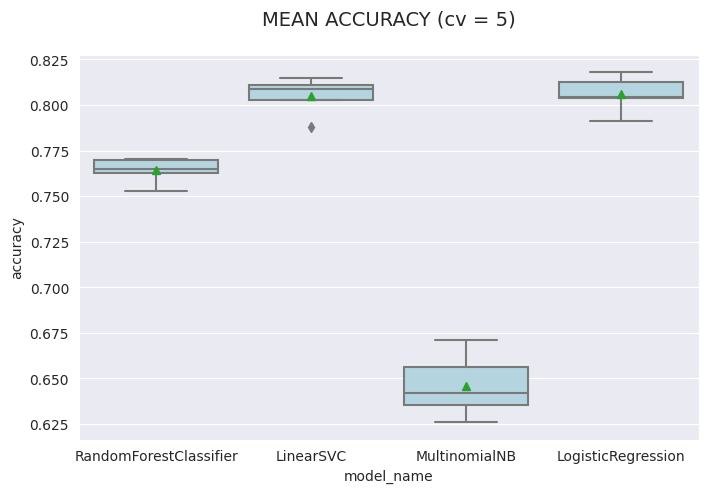

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy',
            data=cv_df,
            color='lightblue',
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

#5. Model Evaluation

In [25]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(X_selected, labels, filtered_df.index, test_size=0.25, random_state=1)

model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

 precision

 recall

 f1-score

 support

In [27]:
# Classification report
print('\t\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred,
                                    target_names= filtered_df['Product'].unique()))

				CLASSIFICATIION METRICS

                                    precision    recall  f1-score   support

Credit reporting, repair, or other       0.81      0.87      0.84     31175
                   Debt collection       0.79      0.75      0.77     21572
                          Mortgage       0.82      0.88      0.85     13161
                     Consumer Loan       0.55      0.02      0.04      2377

                          accuracy                           0.81     68285
                         macro avg       0.75      0.63      0.63     68285
                      weighted avg       0.80      0.81      0.79     68285



CONFUSION MATRIX

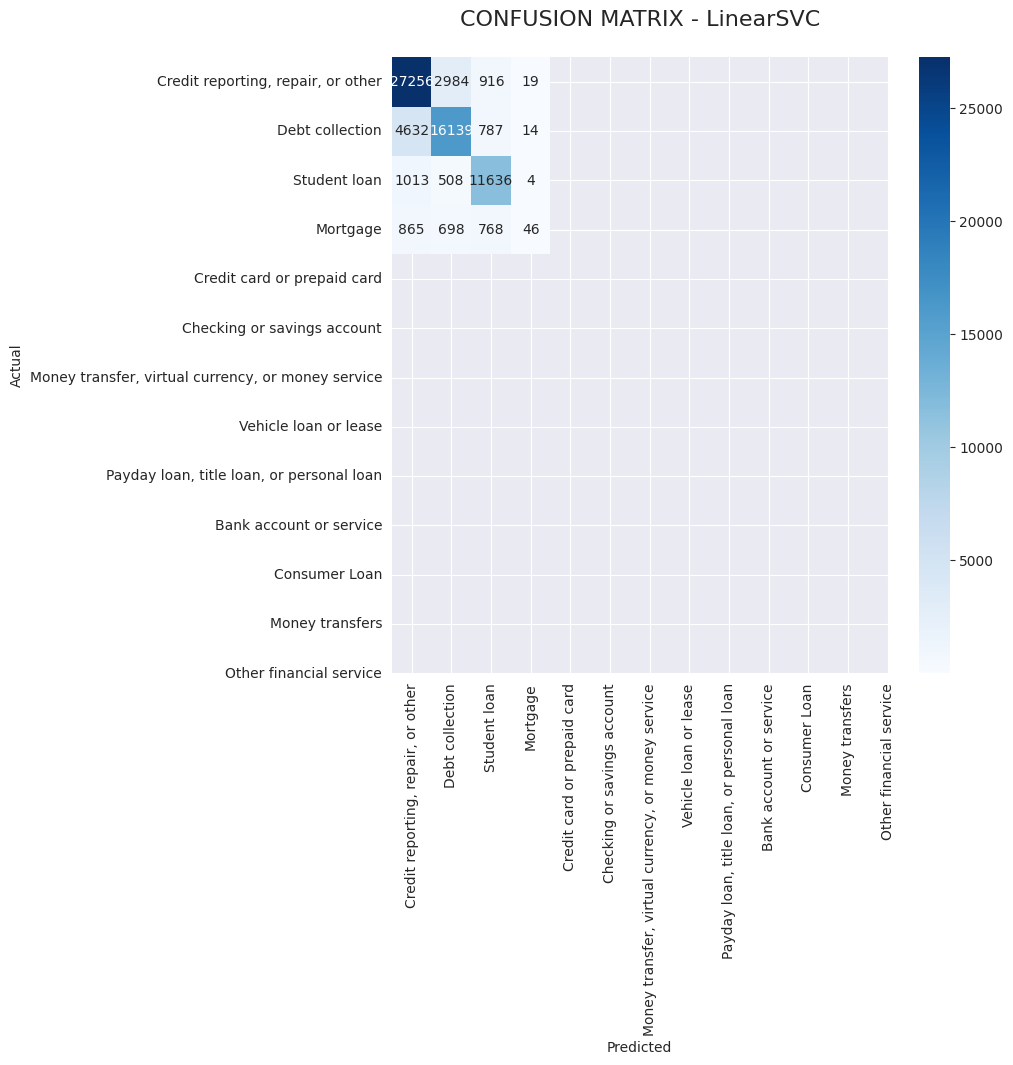

In [28]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Product.values,
            yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

#6. Prediction

In [30]:
X_train, X_test, y_train, y_test = train_test_split(filtered_df['Consumer_complaint_narrative'],
                                                    filtered_df['category_id'],
                                                    test_size=0.25,
                                                    random_state=0)


tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2), stop_words='english')  # Initialize a TF-IDF vectorizer

X_train_tfidf = tfidf.fit_transform(X_train)  # Fit and transform the training data

X_test_tfidf = tfidf.transform(X_test)  # Transform the testing data using the same vectorizer

model = LinearSVC().fit(X_train_tfidf, y_train)   # Train  model on the TF-IDF transformed training data

In [52]:
new_complaint = """Equifax exposed my personal information without my consent, as part of their recent data breach. \
In addition, they dragged their feet in the announcement of the report, and even allowed their upper management to sell \
off stock before the announcement."""

new_complaint_tfidf = tfidf.transform([new_complaint])

prediction = model.predict(new_complaint_tfidf)

category_to_product = {}

# Iterate through unique products and populate the dictionary
for product, category_id in zip(filtered_df['Product'], filtered_df['category_id']):
    category_to_product[category_id] = product

product_category = category_to_product.get(prediction[0], 'Unknown Product')


print(f"Given category_id {prediction[0]} \nproduct category: {product_category}")


Given category_id 0 
product category: Credit reporting, repair, or other


Actual Product and Consumer_complaint_narrative

In [48]:
filtered_df[filtered_df['Consumer_complaint_narrative'] == new_complaint]

,Product,Consumer_complaint_narrative,category_id
420821,"Credit reporting, repair, or other",Equifax exposed my personal information withou...,0
